In [1]:
# Import relevant Python libraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
data = pd.read_csv("marketing_sales_data.csv")
data.head(10)
data.shape

(572, 5)

In [6]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
567,False,False,False,False,False
568,False,False,False,False,False
569,False,False,False,False,False
570,False,False,False,False,False


In [7]:
#Use any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row

data.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
567    False
568    False
569    False
570    False
571    False
Length: 572, dtype: bool

In [8]:
# Step 3. Use .sum() to get the number of rows that contain missing values
data.isna().any(axis=1).sum()

0

There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

In [9]:
# Step 1. Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped
# Step 2. To update the DataFrame, reassign it to the result

data = data.dropna(axis=0)

In [10]:
# Check to make sure that the data does not contain any rows with missing values now

# Step 1. Start with .isna() to get booleans indicating whether each value in the data is missing
# Step 2. Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row
# Step 3. Use .sum() to get the number of rows that contain missing values

data.isna().any(axis=1).sum()

0

Start by creating a plot of pairwise relationships in the data.
This will help you visualize the relationships between variables in the data and help you check model assumptions.

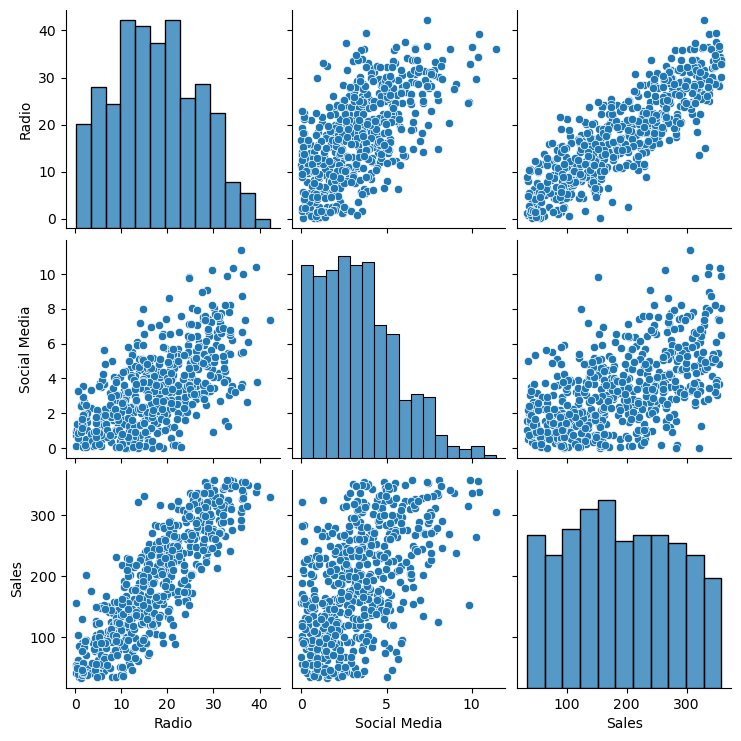

In [11]:
sns.pairplot(data)

Model Building¶


Start by selecting only the columns that are needed for the model that you will build from the data.

In [13]:
ols_data = data[["Radio", "Sales"]]
ols_data.head(10)

,Radio,Sales
0,3.518070,55.261284
1,7.756876,67.574904
2,20.348988,272.250108
3,20.108487,195.102176
4,31.653200,273.960377
5,5.561586,39.992087
6,13.951808,147.150178
7,28.352592,229.141912
8,15.322175,222.696768
9,26.914287,322.466797


In [14]:
# Write the linear regression formula
# Save it in a variable

ols_formula = "Sales ~ Radio"

In [15]:
# Implement OLS

OLS = ols(formula = ols_formula, data = ols_data)

In [17]:
# Fit the model to the data
# Save the fitted model in a variable
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):          4.38e-167
Time:                        20:30:17   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sales = 8.2998	 * radio promotion budget + 43.8789

<Axes: xlabel='Radio', ylabel='Sales'>

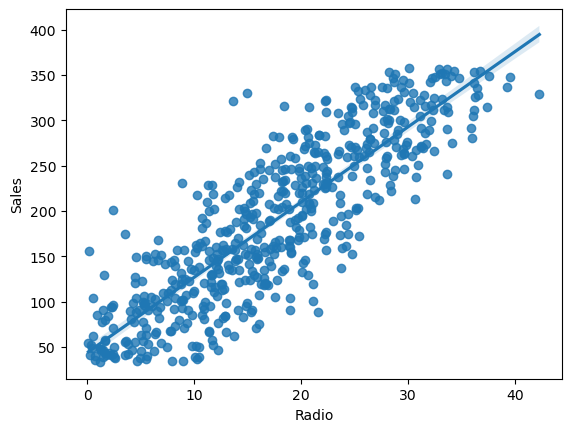

In [19]:
# Plot the OLS data with the best fit regression line

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

In [20]:
# Get the residuals from the model

residuals = model.resid

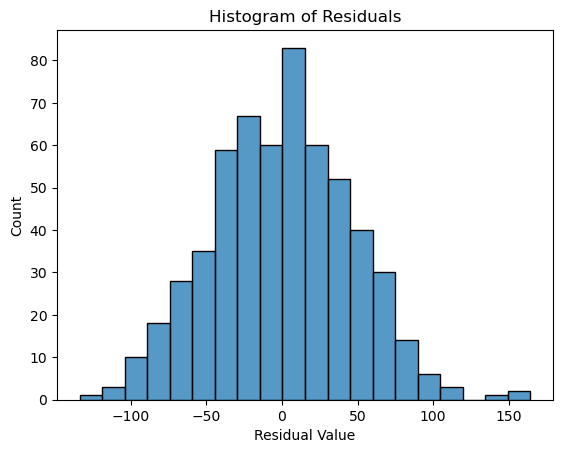

In [21]:
# Visualize the distribution of the residuals

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

Create a Q-Q plot to confirm the assumption of normality.

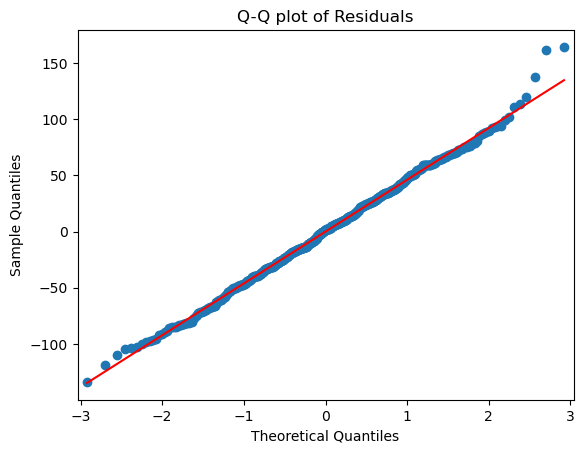

In [22]:
# Create a Q-Q plot 
sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

In [23]:
# Get fitted values

fitted_values = model.predict(ols_data["Radio"])

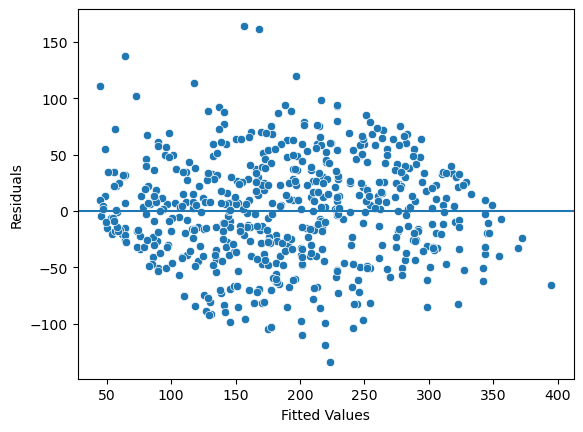

In [24]:
# Create a scatterplot of residuals against fitted values

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()